In [ ]:
from google.colab import files
uploaded = files.upload()

#**L1 Regularization Strength:**
1. Adjust l1(0.001) to control regularization strength.
2. Small values (e.g., l1(0.0001)) for weak regularization.
3. Large values (e.g., l1(0.1)) for strong regularization.
#**Benefits of Transfer Learning:**
1. Leveraging pre-trained models.
2. Reduced training time.
3. Improved performance.
#**Benefits of L1 Regularization:**
1. Prevents overfitting.
2. Reduces model complexity.
3. Improves generalization.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/dogcat.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split


# Define paths
train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'
validation_dir = '/content/validation'

# Create validation directory
if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)


# Split train directory into training and validation sets
train_classes = ['dogs', 'cats']  # Specify class names


for class_name in train_classes:
    class_train_dir = os.path.join(train_dir, class_name)
    class_validation_dir = os.path.join(validation_dir, class_name)

    # Create class directory in validation set
    if not os.path.exists(class_validation_dir):
        os.makedirs(class_validation_dir)

    # Get image file names
    image_file_names = os.listdir(class_train_dir)

    # Split image file names into training and validation sets
    train_image_file_names, validation_image_file_names = train_test_split(image_file_names, test_size=0.2, random_state=42)

    # Move validation images to validation directory
    for image_file_name in validation_image_file_names:
        image_file_path = os.path.join(class_train_dir, image_file_name)
        destination_path = os.path.join(class_validation_dir, image_file_name)
        shutil.move(image_file_path, destination_path)


print("Train, validation, and test directories are ready.")

Train, validation, and test directories are ready.


Found 6402 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 92s 375ms/step - accuracy: 0.7428 - loss: 6.9530 - val_accuracy: 0.8997 - val_loss: 0.9549
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 348ms/step - accuracy: 0.8739 - loss: 0.9574 - val_accuracy: 0.8023 - val_loss: 1.0909
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 346ms/step - accuracy: 0.8663 - loss: 0.9583 - val_accuracy: 0.9021 - val_loss: 0.8646
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 73s 350ms/step - accuracy: 0.8898 - loss: 0.8905 - val_accuracy: 0.8957 - val_loss: 0.8528
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 347ms/step - accuracy: 0.8939 - loss: 0.8297 - val_accuracy: 0.8255 - val_loss: 0.9920
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 348ms/step - accuracy: 0.8923 - loss: 0.8702 - val_accuracy: 0.8809 - val_loss: 0.9079
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 347ms/step - accuracy: 0.8678 - loss: 0.9466 - val_accuracy: 0.9031 - val_loss: 0.7859
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 348ms/step - accuracy: 0.8883 - loss: 0.7961 - val

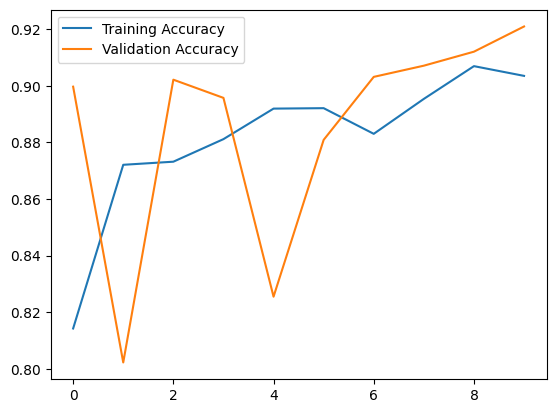

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9173 - loss: 0.7139
Test Loss: 0.713, Test Accuracy: 92.09%


In [6]:
# Import necessary libraries
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.regularizers import l1
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Define constants
TRAIN_DIR = '/content/training_set/training_set'
TEST_DIR = '/content/test_set/test_set'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 10


# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical')


# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))


# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l1(0.001))(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)


# Define new model
model = Model(inputs=base_model.input, outputs=predictions)


# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


# Evaluate model
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss: %.3f, Test Accuracy: %.2f%%' % (test_loss, test_acc*100))

In [13]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss: %.3f, Test Accuracy: %.2f%%' % (test_loss, test_acc*100))


# Save model
model.save('dog_cat_classifier.h5')


# Load saved model
from tensorflow.keras.models import load_model
loaded_model = load_model('dog_cat_classifier.h5')

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9261 - loss: 0.7059


Test Loss: 0.713, Test Accuracy: 92.09%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


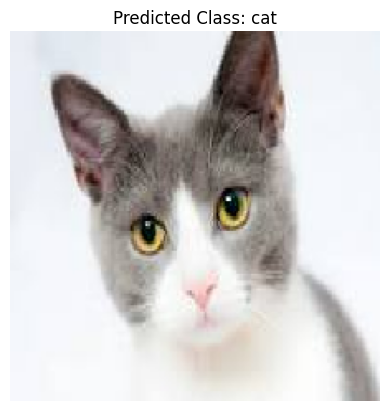

Predicted Class: cat


In [16]:
# Predict 'dog' or 'cat' from input image
def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = loaded_model.predict(img_array/255.0)
    predicted_class = np.argmax(predictions)
    classes = ['cat', 'dog']
    return img, classes[predicted_class]


# Test prediction
img_path = '/content/drive/MyDrive/samim/cat1.jpeg'  # Replace with your image path
img, predicted_class = predict_image(img_path)


# Display image and predicted class
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


print('Predicted Class:', predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


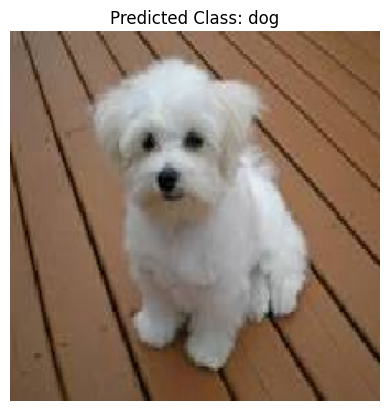

Predicted Class: dog


In [19]:
# Predict 'dog' or 'cat' from input image
def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = loaded_model.predict(img_array/255.0)
    predicted_class = np.argmax(predictions)
    classes = ['cat', 'dog']
    return img, classes[predicted_class]


# Test prediction
img_path = '/content/drive/MyDrive/samim/dog7.jpeg'  # Replace with your image path
img, predicted_class = predict_image(img_path)


# Display image and predicted class
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


print('Predicted Class:', predicted_class)

#**L2 REGULARIZATION**

##**Explanation:**
1. Import l2 from keras.regularizers.
2. Replace l1(0.001) with l2(0.01) in the Dense layer.
**L2 regularization (also known as weight decay) adds a penalty term to the loss function proportional to the square of the weights.**

###**L2 Regularization Hyperparameter:**
1. 0.01 is a common value for L2 regularization.
2. Adjust this value to balance model complexity and overfitting.

Found 6402 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 77s 359ms/step - accuracy: 0.7583 - loss: 1.6957 - val_accuracy: 0.9135 - val_loss: 0.3741
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 349ms/step - accuracy: 0.8965 - loss: 0.3832 - val_accuracy: 0.9090 - val_loss: 0.3130
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 346ms/step - accuracy: 0.9027 - loss: 0.3271 - val_accuracy: 0.9006 - val_loss: 0.3316
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 350ms/step - accuracy: 0.9041 - loss: 0.3237 - val_accuracy: 0.9011 - val_loss: 0.3258
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 348ms/step - accuracy: 0.9193 - loss: 0.2958 - val_accuracy: 0.9160 - val_loss: 0.2922
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 73s 351ms/step - accuracy: 0.8982 - loss: 0.3264 - val_accuracy: 0.9090 - val_loss: 0.3162
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 347ms/step - accuracy: 0.9082 - loss: 0.3099 - val_accuracy: 0.9090 - val_loss: 0.2820
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 73s 349ms/step - accuracy: 0.9276 - loss: 0.2647 - val

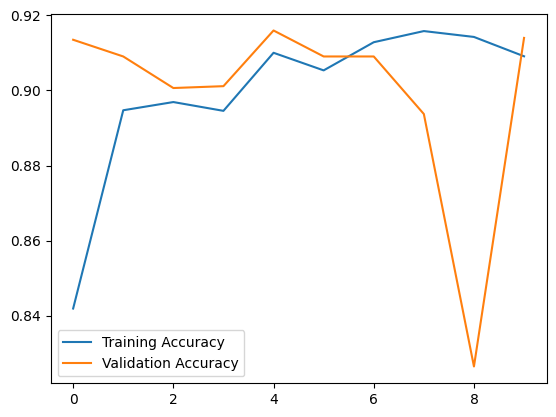

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9172 - loss: 0.2950
Test Loss: 0.300, Test Accuracy: 91.40%


In [20]:
# Import necessary libraries
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.regularizers import l2
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Define constants
TRAIN_DIR = '/content/training_set/training_set'
TEST_DIR = '/content/test_set/test_set'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 10


# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical')


# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))


# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


# Add custom layers with L2 regularization
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # L2 regularization
predictions = Dense(NUM_CLASSES, activation='softmax')(x)


# Define new model
model = Model(inputs=base_model.input, outputs=predictions)


# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


# Evaluate model
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss: %.3f, Test Accuracy: %.2f%%' % (test_loss, test_acc*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


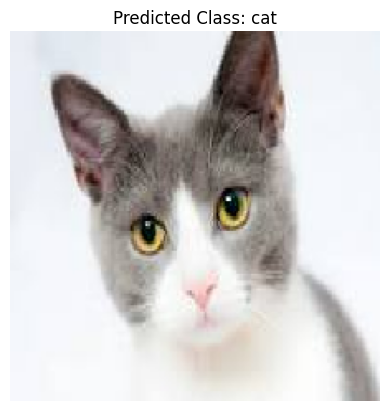

Predicted Class: cat


In [21]:
# Predict 'dog' or 'cat' from input image
def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = loaded_model.predict(img_array/255.0)
    predicted_class = np.argmax(predictions)
    classes = ['cat', 'dog']
    return img, classes[predicted_class]


# Test prediction
img_path = '/content/drive/MyDrive/samim/cat1.jpeg'  # Replace with your image path
img, predicted_class = predict_image(img_path)


# Display image and predicted class
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


print('Predicted Class:', predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


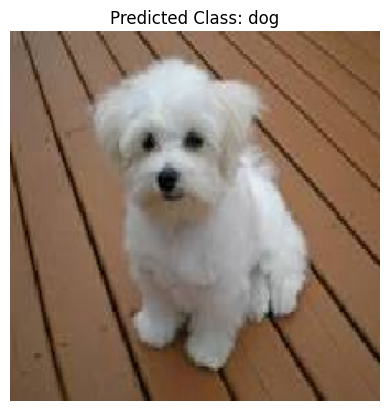

Predicted Class: dog


In [22]:
# Predict 'dog' or 'cat' from input image
def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = loaded_model.predict(img_array/255.0)
    predicted_class = np.argmax(predictions)
    classes = ['cat', 'dog']
    return img, classes[predicted_class]


# Test prediction
img_path = '/content/drive/MyDrive/samim/dog7.jpeg'  # Replace with your image path
img, predicted_class = predict_image(img_path)


# Display image and predicted class
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


print('Predicted Class:', predicted_class)

#**Dropout regularization.**

##**Explanation:**
1. Import Dropout from keras.layers.
2. Add Dropout(0.2) layer after the Dense(128) layer.
**Dropout randomly drops out neurons during training, preventing overfitting.**
##**Dropout Hyperparameter:**
1. 0.2 means 20% of neurons will be dropped out.
2. Adjust this value to balance model complexity and overfitting.

Found 6402 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 77s 359ms/step - accuracy: 0.7812 - loss: 0.8046 - val_accuracy: 0.8735 - val_loss: 0.2825
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 348ms/step - accuracy: 0.9029 - loss: 0.2266 - val_accuracy: 0.9170 - val_loss: 0.1985
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 346ms/step - accuracy: 0.9261 - loss: 0.1792 - val_accuracy: 0.9140 - val_loss: 0.1968
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 347ms/step - accuracy: 0.9151 - loss: 0.2033 - val_accuracy: 0.9239 - val_loss: 0.1791
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 347ms/step - accuracy: 0.9317 - loss: 0.1645 - val_accuracy: 0.9229 - val_loss: 0.1842
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 348ms/step - accuracy: 0.9404 - loss: 0.1510 - val_accuracy: 0.9244 - val_loss: 0.1943
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 350ms/step - accuracy: 0.9365 - loss: 0.1606 - val_accuracy: 0.9298 - val_loss: 0.1883

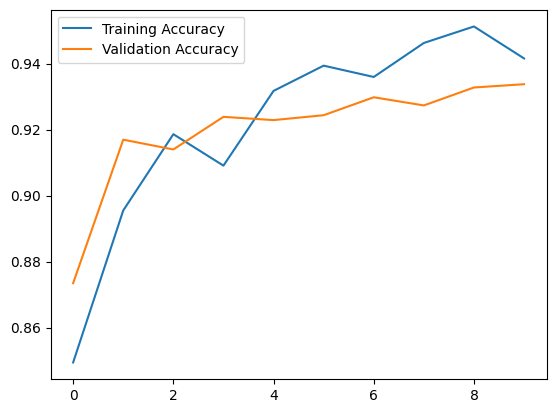

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9285 - loss: 0.1813
Test Loss: 0.171, Test Accuracy: 93.38%


In [23]:
# Import necessary libraries
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Define constants
TRAIN_DIR = '/content/training_set/training_set'
TEST_DIR = '/content/test_set/test_set'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 10


# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical')


# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))


# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


# Add custom layers with Dropout regularization
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)  # Dropout regularization
predictions = Dense(NUM_CLASSES, activation='softmax')(x)


# Define new model
model = Model(inputs=base_model.input, outputs=predictions)


# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


# Evaluate model
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss: %.3f, Test Accuracy: %.2f%%' % (test_loss, test_acc*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


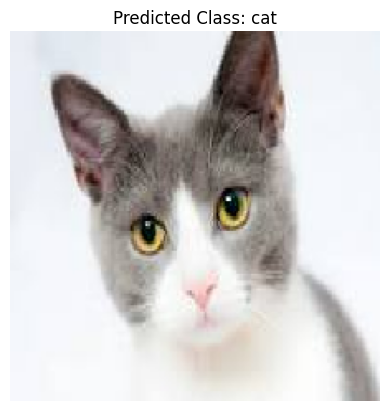

Predicted Class: cat


In [24]:
# Predict 'dog' or 'cat' from input image
def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = loaded_model.predict(img_array/255.0)
    predicted_class = np.argmax(predictions)
    classes = ['cat', 'dog']
    return img, classes[predicted_class]


# Test prediction
img_path = '/content/drive/MyDrive/samim/cat1.jpeg'  # Replace with your image path
img, predicted_class = predict_image(img_path)


# Display image and predicted class
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


print('Predicted Class:', predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


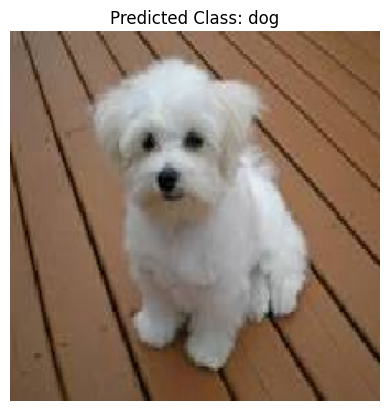

Predicted Class: dog


In [25]:
# Predict 'dog' or 'cat' from input image
def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = loaded_model.predict(img_array/255.0)
    predicted_class = np.argmax(predictions)
    classes = ['cat', 'dog']
    return img, classes[predicted_class]


# Test prediction
img_path = '/content/drive/MyDrive/samim/dog7.jpeg'  # Replace with your image path
img, predicted_class = predict_image(img_path)


# Display image and predicted class
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


print('Predicted Class:', predicted_class)

#**Elasticnet regularization.**

##**Explanation:**
1. Import l1_l2 from keras.regularizers.
2. Replace Dropout(0.2) with kernel_regularizer=l1_l2(l1=0.001, l2=0.01).
3. Elastic Net regularization combines L1 and L2 regularization.
##**Elastic Net Hyperparameters:**
1. l1=0.001 controls L1 regularization strength.
2. l2=0.01 controls L2 regularization strength.
3. Adjust these values to balance model complexity and overfitting.

Found 6402 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 77s 359ms/step - accuracy: 0.7937 - loss: 6.6955 - val_accuracy: 0.8888 - val_loss: 1.6872
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 347ms/step - accuracy: 0.8446 - loss: 1.5492 - val_accuracy: 0.8794 - val_loss: 1.0368
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 346ms/step - accuracy: 0.8502 - loss: 1.2076 - val_accuracy: 0.8285 - val_loss: 1.5356
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 348ms/step - accuracy: 0.8627 - loss: 1.2493 - val_accuracy: 0.8146 - val_loss: 1.2461
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 346ms/step - accuracy: 0.8635 - loss: 1.1106 - val_accuracy: 0.8903 - val_loss: 0.9632
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 347ms/step - accuracy: 0.8706 - loss: 0.9587 - val_accuracy: 0.9100 - val_loss: 0.8383
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 348ms/step - accuracy: 0.8768 - loss: 0.9194 - val_accuracy: 0.9046 - val_loss: 0.7907

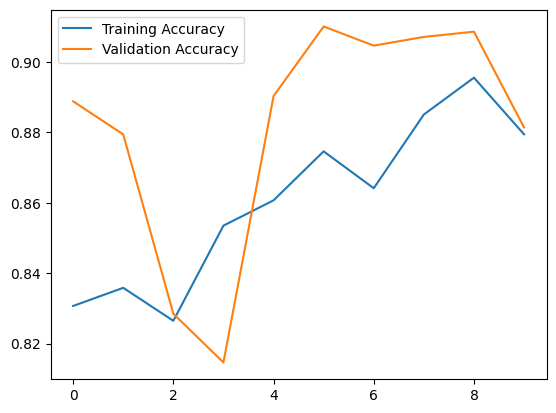

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8696 - loss: 0.8803
Test Loss: 0.868, Test Accuracy: 88.14%


In [26]:
# Import necessary libraries
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Define constants
TRAIN_DIR = '/content/training_set/training_set'
TEST_DIR = '/content/test_set/test_set'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 10


# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical')


# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))


# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


# Add custom layers with Elastic Net regularization
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.01))(x)  # Elastic Net regularization
predictions = Dense(NUM_CLASSES, activation='softmax')(x)


# Define new model
model = Model(inputs=base_model.input, outputs=predictions)


# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


# Evaluate model
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss: %.3f, Test Accuracy: %.2f%%' % (test_loss, test_acc*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


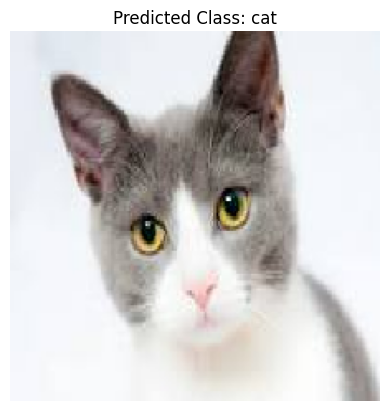

Predicted Class: cat


In [27]:
# Predict 'dog' or 'cat' from input image
def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = loaded_model.predict(img_array/255.0)
    predicted_class = np.argmax(predictions)
    classes = ['cat', 'dog']
    return img, classes[predicted_class]


# Test prediction
img_path = '/content/drive/MyDrive/samim/cat1.jpeg'  # Replace with your image path
img, predicted_class = predict_image(img_path)


# Display image and predicted class
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


print('Predicted Class:', predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


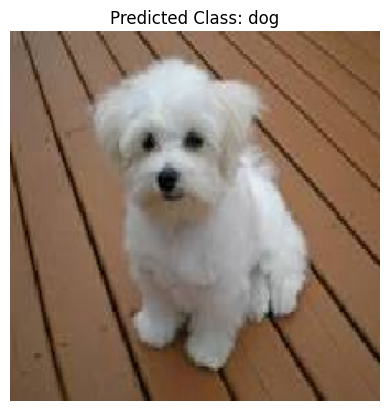

Predicted Class: dog


In [28]:
# Predict 'dog' or 'cat' from input image
def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = loaded_model.predict(img_array/255.0)
    predicted_class = np.argmax(predictions)
    classes = ['cat', 'dog']
    return img, classes[predicted_class]


# Test prediction
img_path = '/content/drive/MyDrive/samim/dog7.jpeg'  # Replace with your image path
img, predicted_class = predict_image(img_path)


# Display image and predicted class
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


print('Predicted Class:', predicted_class)